In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


## DataFrame Attributes

In [10]:
print('.shape: %s' % str(titanic.shape))
print('.size: %s' % titanic.size)
print('.index: %s' % str(titanic.index))
print('.columns: ', titanic.columns)

.shape: (891, 9)
.size: 8019
.index: RangeIndex(start=0, stop=891, step=1)
.columns:  Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')


In [11]:
sales = pd.read_csv('sales.csv', index_col = 0)

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     4 non-null      int64  
 2   Wed     4 non-null      int64  
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 192.0+ bytes


In [13]:
# Calculate min for each column
sales.min(axis=0)

Mon    17.0
Tue     9.0
Wed    15.0
Thu     8.0
Fri     7.0
dtype: float64

In [14]:
# Calculate min for each row
sales.min(axis=1)

Steven    15.0
Mike       9.0
Andi       8.0
Paul       7.0
dtype: float64

In [15]:
# User defined series
def range(series):
    return series.max() - series.min()

In [19]:
sales.apply(range)

Mon    70.0
Tue    58.0
Wed    59.0
Thu    79.0
Fri    26.0
dtype: float64

In [21]:
sales.apply(range, axis=1)

Steven    19.0
Mike      78.0
Andi      46.0
Paul      80.0
dtype: float64

In [23]:
# Can also acheive with lambda function
sales.apply(lambda series: series.max() - series.min(), axis=1)

Steven    19.0
Mike      78.0
Andi      46.0
Paul      80.0
dtype: float64

In [24]:
summer = pd.read_csv('summer.csv')
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [25]:
# Print first character of each athlete's name
summer.Athlete.apply(lambda x: x[0])

0        H
1        H
2        D
3        M
4        C
        ..
31160    J
31161    R
31162    T
31163    A
31164    L
Name: Athlete, Length: 31165, dtype: object

# Map Method
apply works on a row / column basis of a DataFrame, applymap works element-wise on a DataFrame, and map works element-wise on a Series.

In [26]:
summer.Athlete.map(lambda x: x[1])

0        A
1        E
2        R
3        A
4        H
        ..
31160    A
31161    E
31162    O
31163    L
31164    I
Name: Athlete, Length: 31165, dtype: object

In [27]:
summer.iloc[:, 1:4].applymap(lambda x: x[0])

,City,Sport,Discipline
0,A,A,S
1,A,A,S
2,A,A,S
3,A,A,S
4,A,A,S
...,...,...,...
31160,L,W,W
31161,L,W,W
31162,L,W,W
31163,L,W,W


In [33]:
sales.fillna(0).applymap(lambda x: '$%.1f' % (0.4*x-5))

,Mon,Tue,Wed,Thu,Fri
Steven,$8.6,$5.8,$1.0,$-5.0,$8.2
Mike,$13.0,$-1.4,$24.6,$29.8,$-0.2
Andi,$1.8,$8.2,$16.6,$-1.8,$6.6
Paul,$29.8,$21.8,$5.8,$13.0,$-2.2


# MatPlotLib

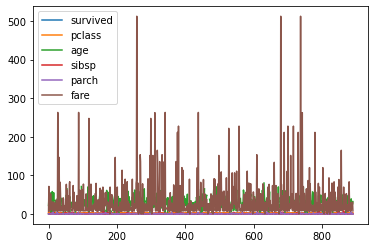

In [37]:
titanic.plot()
plt.show()

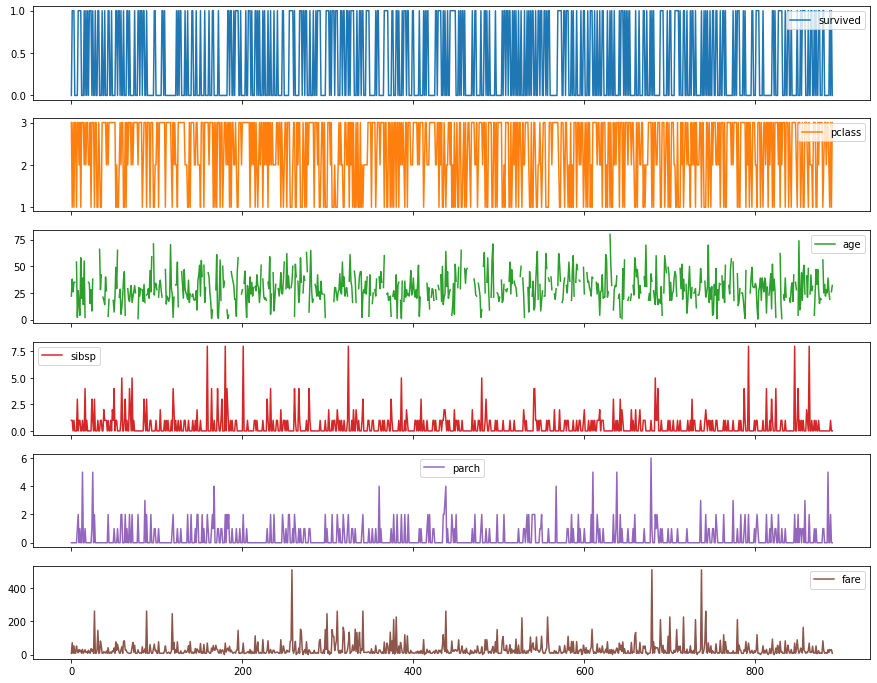

In [43]:
titanic.plot(subplots=True, figsize=(15, 12), sharex=True)
plt.show()

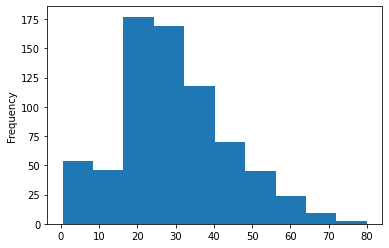

In [45]:
titanic['age'].plot(kind='hist')
plt.show()

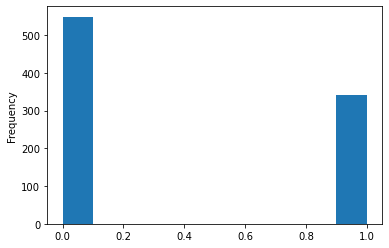

In [46]:
titanic['survived'].plot(kind='hist')
plt.show()

# Groupby Object

In [47]:
titanic_slice = titanic.loc[:, ['sex', 'age']]

In [48]:
gbo = titanic_slice.groupby('sex')

In [49]:
gbo.groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

In [54]:
gbo.agg({'age': 'mean'})
gbo.mean()

,age
sex,
female,27.915709
male,30.726645


In [58]:
titanic.groupby(['survived','sex'])[['fare','age']].max()

fare   age
survived sex                   
0        female  151.5500  57.0
         male    263.0000  74.0
1        female  512.3292  63.0
         male    512.3292  80.0

In [64]:
summaryStats = titanic.groupby('pclass').agg({'sex': 'count', 'survived': 'sum', 'fare': 'mean', 'age': 'mean'}).rename(columns={'sex':'passengers'})

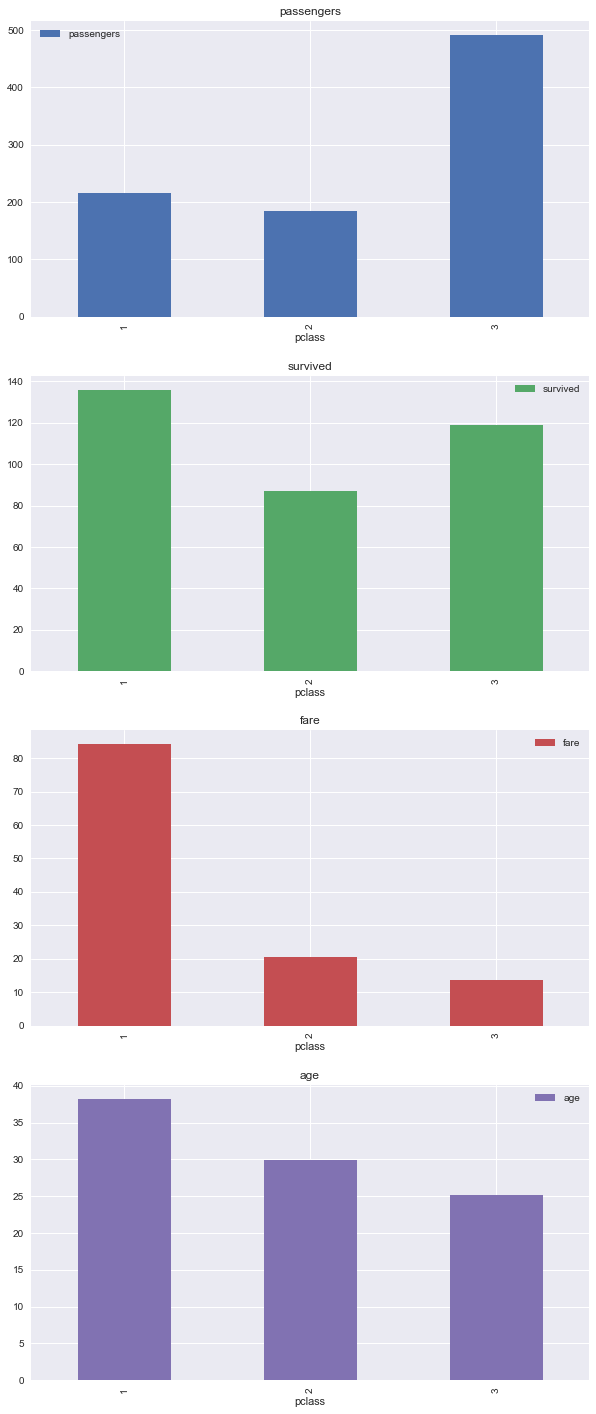

In [66]:
plt.style.use('seaborn')
summaryStats.plot(kind = 'bar', subplots=True, figsize = (10, 25), sharex=False)
plt.show()

# Datetime Data

In [73]:
temp = pd.read_csv('temp.csv', parse_dates=['datetime'], index_col='datetime')
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [74]:
temp['2013-01-01 00:00:00':'2013-02-01 00:00:00']

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
...,...,...
2013-01-31 20:00:00,17.6,12.7
2013-01-31 21:00:00,17.0,12.4
2013-01-31 22:00:00,16.7,12.4


In [75]:
pd.to_datetime("2015 May 5th")

Timestamp('2015-05-05 00:00:00')

In [76]:
pd.to_datetime(['2020-02-01', 'Apple'], errors='coerce')

DatetimeIndex(['2020-02-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [77]:
temp.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


In [82]:
temp['Difference'] = temp.apply(lambda row: row['LA'] - row['NY'], axis=1)

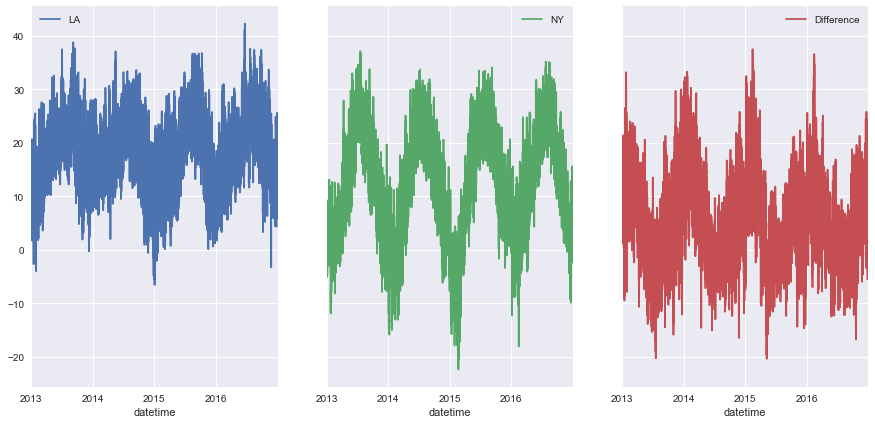

In [88]:
temp.plot(subplots=True, figsize=(15, 7), layout=(1,3), sharey=True)
plt.show()

In [90]:
temp.loc['2015-01']

,LA,NY,Difference
datetime,,,
2015-01-01 00:00:00,3.8,-5.1,8.9
2015-01-01 01:00:00,4.4,-5.1,9.5
2015-01-01 02:00:00,3.2,-6.0,9.2
2015-01-01 03:00:00,1.2,-6.0,7.2
2015-01-01 04:00:00,0.2,-6.0,6.2
...,...,...,...
2015-01-31 19:00:00,16.0,-4.5,20.5
2015-01-31 20:00:00,17.0,-4.4,21.4
2015-01-31 21:00:00,16.3,-5.8,22.1


In [91]:
temp.loc[pd.to_datetime(['2015-05-02', '2015-05-03'])]

,LA,NY,Difference
2015-05-02,24.7,15.2,9.5
2015-05-03,24.5,17.9,6.6
